# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [3]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [25]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
type(X)

pandas.core.frame.DataFrame

In [26]:
type(y)

pandas.core.series.Series

In [27]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

In [28]:
# X von dataframe zu Array konvertieren, da er mient er muss es anderst runterladen...
X = X.to_numpy()
y = y.to_numpy()
type(X)

numpy.ndarray

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-(6/7)))

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

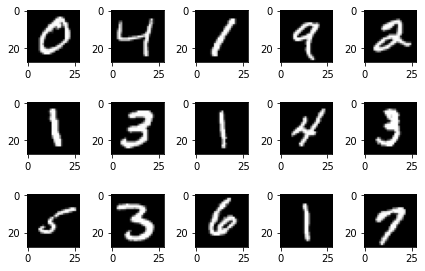

In [9]:
for i in range(1,16):
    plt.subplot(3,5,i)
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    
plt.tight_layout()

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [10]:
#Naive Bayes (NB)
NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB()

GaussianNB()

In [11]:
#Simple linear model (Slm)
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [12]:
%%time
Slm = make_pipeline(StandardScaler(), SGDClassifier(max_iter=100, tol=1e-3))
Slm.fit(X_train, y_train)

Wall time: 1min 35s


C:\Users\Robin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=100))])

In [13]:
#Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [14]:
%%time
RF = RandomForestClassifier(max_depth=5, random_state=0)
RF.fit(X_train, y_train)

Wall time: 23.1 s


RandomForestClassifier(max_depth=5, random_state=0)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [15]:
y_NB_pred = NB.predict(X_test)
y_Slm_pred = Slm.predict(X_test)
y_RF_pred = RF.predict(X_test)

In [16]:
#accuracy
from sklearn.metrics import accuracy_score

In [17]:
print('Naive Bayes accuracy: ',accuracy_score(y_test, y_NB_pred))
print('Simple linear model accuracy: ',accuracy_score(y_test, y_Slm_pred))
print('Random Forest accuracy: ',accuracy_score(y_test, y_RF_pred))

Naive Bayes accuracy:  0.5564443555644436
Simple linear model accuracy:  0.9165083491650835
Random Forest accuracy:  0.8576142385761424


In [18]:
#F-Measure
from sklearn.metrics import f1_score
print('Naive Bayes F-Measure: ',f1_score(y_test, y_NB_pred, average='macro'))
print('Simple linear model F-Measure: ',f1_score(y_test, y_Slm_pred, average='macro'))
print('Random Forest F-Measure: ',f1_score(y_test, y_RF_pred, average='macro'))

Naive Bayes F-Measure:  0.5113074589104382
Simple linear model F-Measure:  0.9158077506237052
Random Forest F-Measure:  0.8543288875143654


Text(0.5, 1.0, 'Random Forest')

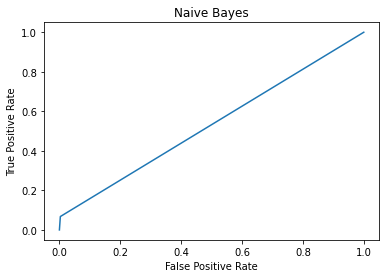

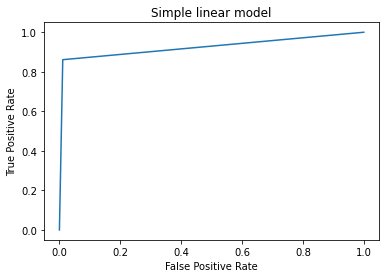

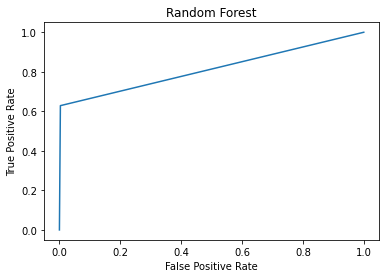

In [46]:
#ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y5 = y_test=='5'
clf_NB = NB.predict(X_test).astype(int)==5
clf_Lms = Slm.predict(X_test).astype(int)==5
clf_RF= RF.predict(X_test).astype(int)==5

fpr_NB, tpr_NB, threshold_NB = roc_curve(y5, clf_NB)
fpr_Slm, tpr_Slm, threshold_Slm = roc_curve(y5, clf_Lms)
fpr_RF, tpr_RF, threshold_RF = roc_curve(y5, clf_RF)

roc_display = RocCurveDisplay(fpr=fpr_NB, tpr=tpr_NB).plot()
plt.title('Naive Bayes')
roc_display = RocCurveDisplay(fpr=fpr_Slm, tpr=tpr_Slm).plot()
plt.title('Simple linear model')
roc_display = RocCurveDisplay(fpr=fpr_RF, tpr=tpr_RF).plot()
plt.title('Random Forest')